# MEUK

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import animation, rc
from IPython.display import HTML
matplotlib.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"


In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [ ]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
%pylab inline

In [ ]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [ ]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [ ]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [ ]:
%matplotlib notebook


In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())

# Stuff

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import json
import csv

##### EXP 15

In [275]:
def loadData(evalType):
    archive = []
    evals = []

    #NSGA-II Data
    #ARK7
#     with open("../data/exp15/ark7-14-nsgaii-2.json") as json_file:
#     with open("../data/exp16/nsga.json") as json_file:
#     with open("../data/200302_152959_1583159399343_rawdata.json") as json_file:
    with open("../data/exp16/new/nsga100-2.json") as json_file:

        
    #ZMOM4
    # with open("../data/200226_222036_1582752036400_rawdata.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["NSGA-II_FixedPop"]["14"]["0"]["elitistArchive"]
        archive.append(data["archive"])
        evals.append(data[evalType])

    # MO-LS data
    #ARK7
    with open("../data/exp15/ark7-14-mols.json") as json_file:
    #ZMOM4
    # with open("../data/200226_222526_1582752326179_rawdata.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["MO-LS"]["14"]["0"]["elitistArchive"]
        archive.append(data["archive"])
        evals.append(data[evalType])


    # MO-LS data
    #ARK7
    with open("../data/exp15/ark7-14-mors.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["MO-RandomSearch"]["14"]["0"]["elitistArchive"]
        archive.append(data["archive"])
        evals.append(data[evalType])
        
    return archive, evals

# evalType = "uniqueEvaluations"
evalType = "totalEvaluations"
archive, evals = loadData(evalType)


In [157]:
# Combine all moments of updates of the elitist archive
def createCombinedEvaluationsList(evals):
    combinedList = []
    for i in range(len(evals)):
        combinedList = list(sorted(combinedList + 
               list(set(evals[i]) - set(combinedList))))

    return combinedList

combinedList = createCombinedEvaluationsList(evals)

In [158]:
# Create mappers that map the number of unique evaluations to an actual state of the elitist archive at that moment.
# Since multiple algorithms have updates in the elitist archive at different moments, we need to map a moment 
#  to a particular state of the elitist archive per algorithm
def createMappers(evaluationsList, evals):
    mappers = []
    for i in range(3):
        mappers.append({})

    # mapper1 = {}
    # mapper2 = {}
    # mapper3 = {}
    idx1 = -1
    idx2 = -1
    idx3 = -1

    for ev in evaluationsList:
        if((idx1+1) != len(evals[0]) and evals[0][idx1+1] == ev):
            idx1 = idx1 + 1
        if((idx2+1) != len(evals[1]) and evals[1][idx2+1] == ev):
            idx2 = idx2 + 1
        if((idx3+1) != len(evals[2]) and evals[2][idx3+1] == ev):
            idx3 = idx3 + 1

        mappers[0][ev] = idx1
        mappers[1][ev] = idx2
        mappers[2][ev] = idx3
    
    return mappers

mappers = createMappers(combinedList, evals)

In [159]:
# Load the front data
def loadFrontData():  
    with open("../../Benchmarks/ark7/front.csv") as csv_file:
        X_FRONT = []
        Y_FRONT = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            X_FRONT.append(float(row[0]))
            Y_FRONT.append(float(row[1]))
            
    return X_FRONT, Y_FRONT

X_FRONT, Y_FRONT = loadFrontData()

##### Animation

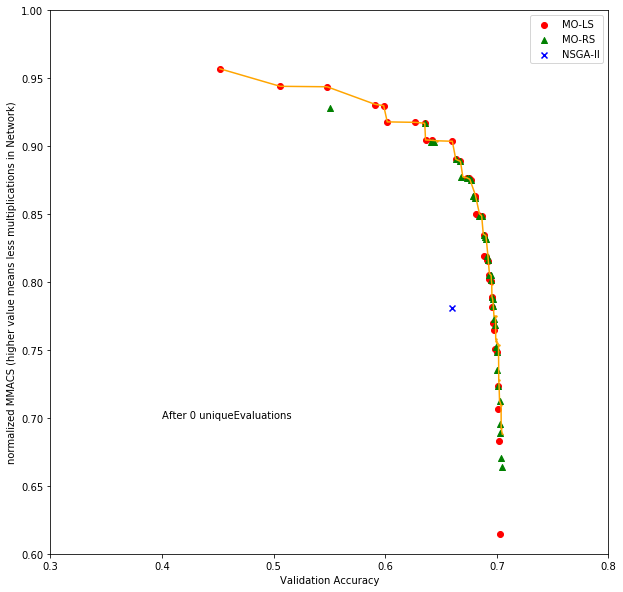

In [276]:
evalType = "uniqueEvaluations"
# evalType = "totalEvaluations"
archive, evals = loadData(evalType)
combinedList = createCombinedEvaluationsList(evals)
mappers = createMappers(combinedList, evals)
X_FRONT, Y_FRONT = loadFrontData()

fig, ax = plt.subplots(figsize=(10,10))

# A larger scaler value corresponds to bigger steps in the animation (and quicker response)
# Set to 1 for all data
scaler = 10

def animate(i):
    ax.clear()
    ax.axis([0.3, 0.8, 0.6, 1])
    ax.set_xlabel("Validation Accuracy")
    ax.set_ylabel("normalized MMACS (higher value means less multiplications in Network)")
    ax.scatter(X_FRONT, Y_FRONT, 2, color="orange")
    ax.plot(X_FRONT, Y_FRONT, color="orange")
    
    newdataX = []
    newdataY = []
    idx = mappers[1][list(mappers[1].keys())[i * scaler]]
    for solution in archive[1][idx]:
        newdataX.append(solution[0])
        newdataY.append(solution[1])
    ax.scatter(newdataX, newdataY, color="red", marker="o", label="MO-LS")
    
    newdataX = []
    newdataY = []
    idx = mappers[2][list(mappers[2].keys())[i * scaler]]
    for solution in archive[2][idx]:
        newdataX.append(solution[0])
        newdataY.append(solution[1])
    ax.scatter(newdataX, newdataY, color="green", marker="^", label="MO-RS")
    
    newdataX = []
    newdataY = []
    idx = mappers[0][list(mappers[0].keys())[i * scaler]]
    for solution in archive[0][idx]:
        newdataX.append(solution[0])
        newdataY.append(solution[1])
    ax.scatter(newdataX, newdataY, color="blue", marker="x", label="NSGA-II")
    
    ax.text(0.4, 0.7, "After " + str(combinedList[i * scaler]) + " " + evalType)
    ax.legend()

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(len(combinedList) / scaler))

from IPython.display import HTML
HTML(ani.to_jshtml())

##### PlotConvergence stuff

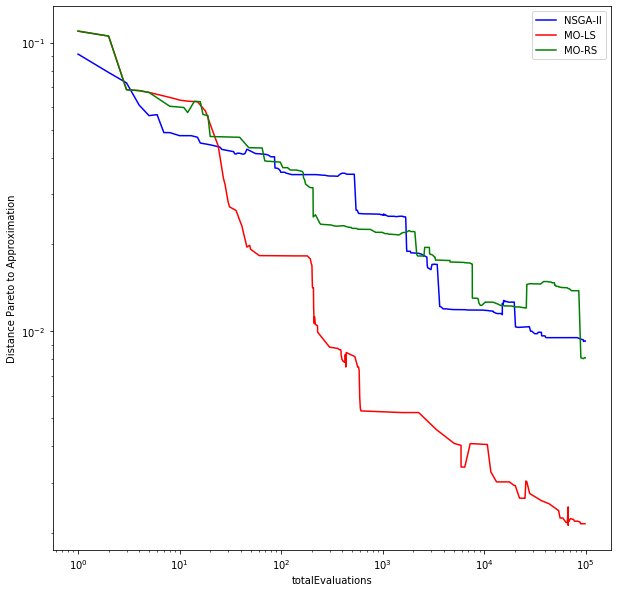

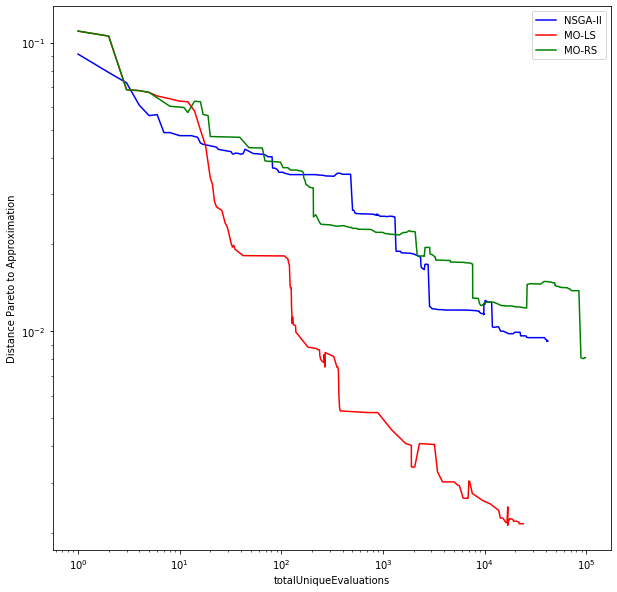

In [53]:
def plotConvergence(evalType):
    fig, ax = plt.subplots(figsize=(10,10))

    #NSGA-II Data
    with open("../data/exp15/ark7-14-nsgaii-2.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["NSGA-II"]["14"]["0"]["paretoDistance"]
        X = data[evalType]
        Y = data["distance"]
        ax.plot(X, Y, label="NSGA-II", color="blue")


    # MO-LS data
    with open("../data/exp15/ark7-14-mols.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["MO-LS"]["14"]["0"]["paretoDistance"]
        X = data[evalType]
        Y = data["distance"]
        ax.plot(X, Y, label="MO-LS", color="red")

    # MO-RS data
    with open("../data/exp15/ark7-14-mors.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]["MO-RandomSearch"]["14"]["0"]["paretoDistance"]
        X = data[evalType]
        Y = data["distance"]
        ax.plot(X, Y, label="MO-RS", color="green")

    ax.set_xlabel(evalType)
    ax.set_ylabel("Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.legend()
    
evalType = "totalEvaluations"
plotConvergence("totalEvaluations")
plotConvergence("totalUniqueEvaluations")

In [8]:
log10XRange = []
for i in range(10):
    for j in range(1,10):
        log10XRange.append(j * pow(10,i))

In [198]:
def removeDuplicates(lst):
    i = 1
    while(True):
        if i == len(lst):
            break
        if lst[i] == lst[i-1]:
            lst.pop(i)
        else:
            i = i + 1
    return lst

#### Old plot convergence functions

In [31]:
# evalType can be ["Unique", "Total"]
# distType can be ["max", "avg"]
def plotConvergenceV1(ax, filename, algo, lbl, col, evalType="Unique", distType="avg", mult=1):
    with open(filename) as json_file:
        data = json.load(json_file)
        data = data["experiments"][algo]
        data = data[list(data.keys())[0]]
        repetitions = len(data)
        datapoints = 100
        Y = np.zeros([repetitions, datapoints])
        maxArrayLength = 0
        for i, key in enumerate(data):
            distance = data[key]["elitistArchive"]["logIntervalEvaluationsDistance"]

#             distance = removeDuplicates(distance)
            
            Y[i,:len(distance)] = distance
            
            maxArrayLength = max(maxArrayLength, len(distance))

        meanDistance = np.mean(Y, 0)
        stdDistance = np.std(Y, 0)

        X = log10XRange[:maxArrayLength]

#         ax.plot(X, meanDistance[:minArrayLength], label=lbl)
        ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], yerr=stdDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        
        
# evalType can be ["Unique", "Total"]
# distType can be ["max", "avg"]
def plotConvergenceV2(ax, filename, algo, lbl, col, evalType="Unique", distType="avg", mult=1, error=True):
    with open(filename) as json_file:
        data = json.load(json_file)
        data = data["experiments"][algo]
        data = data[list(data.keys())[0]]
        repetitions = len(data)
        datapoints = 100
        Y = np.zeros([repetitions, datapoints])
        maxArrayLength = 0
        for i, key in enumerate(data):
            distance = data[key]["elitistArchive"]["logIntervalEvaluationsDistance"][evalType][distType]

#             distance = removeDuplicates(distance)
            
            Y[i,:len(distance)] = distance
            
            maxArrayLength = max(maxArrayLength, len(distance))

        meanDistance = np.mean(Y, 0)
        stdDistance = np.std(Y, 0)

        X = log10XRange[:maxArrayLength]

#         ax.plot(X, meanDistance[:minArrayLength], label=lbl)
        if(error):
            ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], yerr=stdDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        else:
            ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        
        

#### Current plotConvergence function

In [6]:
# evalType can be ["Unique", "Total"]
# distType can be ["max", "avg"]
def plotConvergenceV3(ax, filename, algo, lbl, col, evalType="Unique", distType="avg", mult=1):
    with open(filename) as json_file:
        data = json.load(json_file)
        data = data["experiments"][algo]
        data = data[list(data.keys())[0]]
        repetitions = len(data)
        datapoints = 100
        Y = np.zeros([repetitions, datapoints])
        X = [];
        maxArrayLength = 0
        for i, key in enumerate(data):
            if ("logIntervalEvaluationsDistance" not in data[key]["elitistArchive"].keys()):
                continue
            distance = data[key]["elitistArchive"]["logIntervalEvaluationsDistance"][evalType][distType]            
            Y[i,:len(distance)] = distance
        
            newX = data[key]["elitistArchive"]["logIntervalEvaluationsDistance"][evalType]["evals"]
            if (len(newX) > len(X)):
                X = newX
            
            maxArrayLength = max(maxArrayLength, len(distance))

        meanDistance = np.mean(Y, 0)
        stdDistance = np.std(Y, 0)

#         ax.plot(X, meanDistance[:minArrayLength], label=lbl)
        ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        

In [32]:
# evalType can be ["Unique", "Total"]
# distType can be ["max", "avg"]
def plotConvergenceV4(ax, filename, lbl, col, evalType="Unique", distType="avg", mult=1, error=True):
    with open(filename) as json_file:
        data = json.load(json_file)
        
        repetitions = len(data)
        datapoints = 100
        Y = np.zeros([repetitions, datapoints])
        X = []
        maxArrayLength = 0
        
        for i, key in enumerate(data):
            selectedData=data[i]["IntervalEvaluationsDistance"][evalType]
            distance = selectedData[distType]
            Y[i,:len(distance)] = distance
            
            newX = selectedData["evals"]
            if (len(newX) > len(X)):
                X = newX
                
            maxArrayLength = max(maxArrayLength, len(distance))

        
        meanDistance = np.mean(Y, 0)
        stdDistance = np.std(Y, 0)

        if error:
            ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], yerr=stdDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        else:
            ax.errorbar(np.multiply(X, mult), meanDistance[:maxArrayLength], 
                    label=lbl, capsize=3, elinewidth=1, color=col)
        

#### Meuk

#####  These results have 5 repetitions per algorithm, but unique evaluations is not stored properly. They were used to prototype and build the visualization function

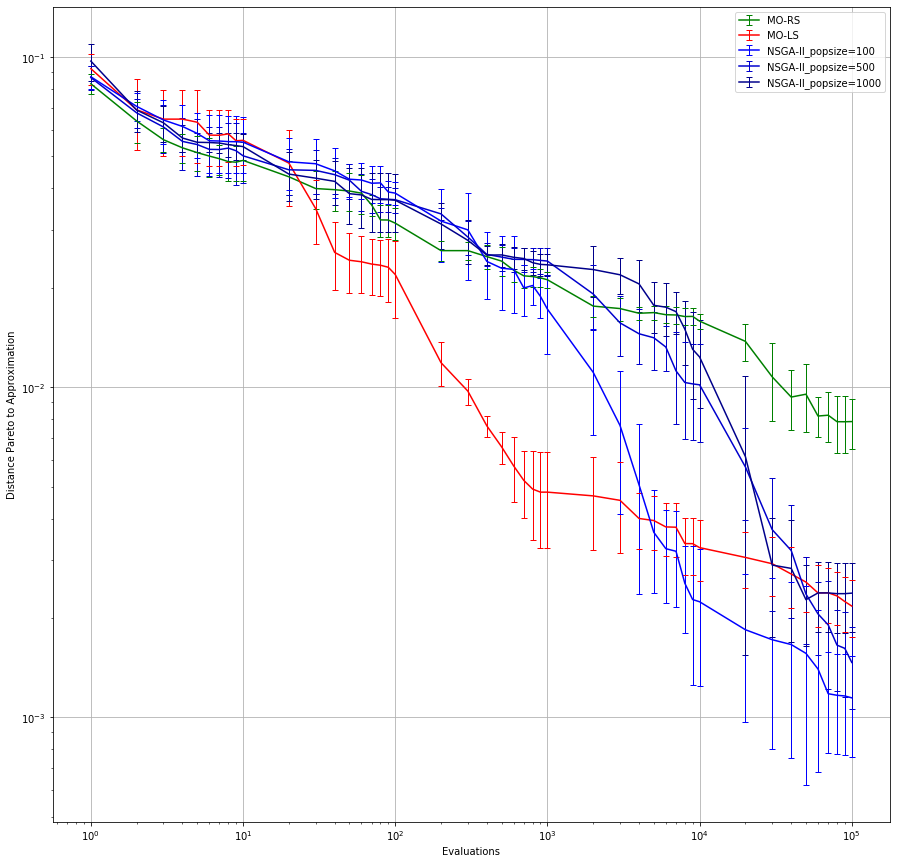

In [316]:
fig, ax = plt.subplots(figsize=(15,15))

# Uses version 1
plotConvergenceV1(ax, "../data/200302_122818_1583148498100_rawdata.json", "MO-RandomSearch_FixedPop", "MO-RS", "green")
plotConvergenceV1(ax, "../data/200302_122818_1583148498100_rawdata.json", "MO-LS_FixedPop", "MO-LS", "red")
plotConvergenceV1(ax, "../data/200302_122818_1583148498100_rawdata.json", "NSGA-II_FixedPop", "NSGA-II_popsize=100", "blue")
plotConvergenceV1(ax, "../data/200302_123834_1583149114047_rawdata.json", "NSGA-II_FixedPop", "NSGA-II_popsize=500", "mediumblue")
plotConvergenceV1(ax, "../data/200302_123458_1583148898316_rawdata.json", "NSGA-II_FixedPop", "NSGA-II_popsize=1000", "darkblue")

ax.set_xlabel("Evaluations")
ax.set_ylabel("Distance Pareto to Approximation")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()
ax.legend()

##### These results have 20 repetitions per algorithm, but unique evaluations is not stored properly.

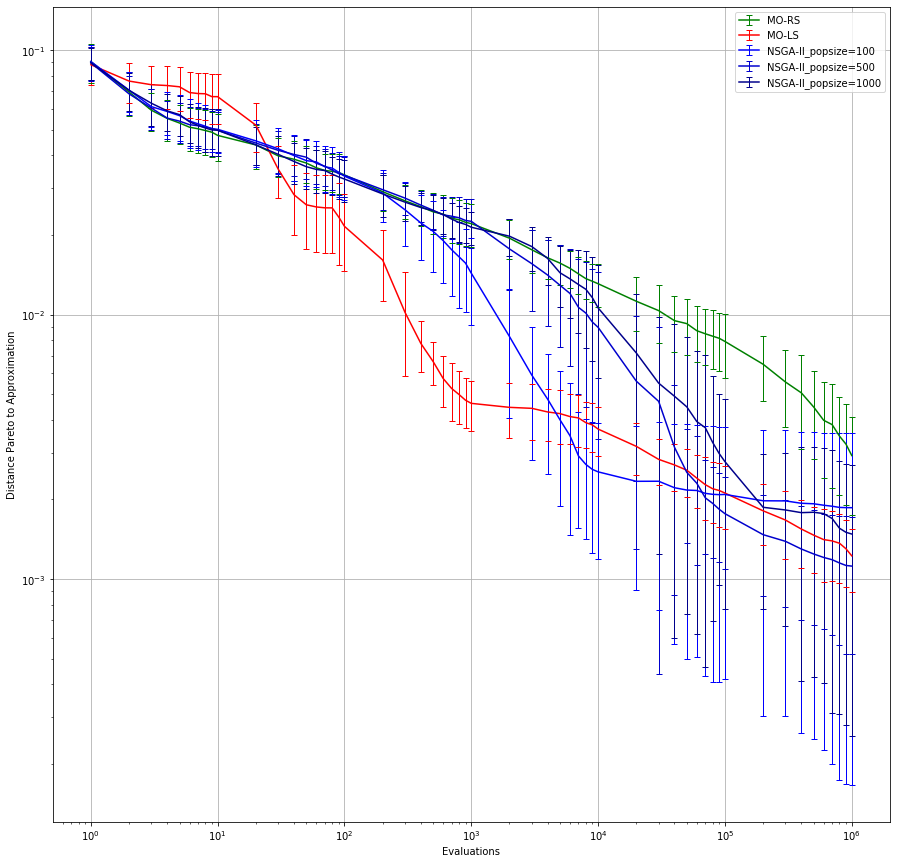

In [318]:
fig, ax = plt.subplots(figsize=(15,15))

# Uses version 1
plotConvergenceV1(ax, "../data/exp16/mols_mors.json", "MO-RandomSearch_FixedPop", "MO-RS", "green", 1)
plotConvergenceV1(ax, "../data/exp16/mols_mors.json", "MO-LS_FixedPop", "MO-LS", "red", 1.01)
plotConvergenceV1(ax, "../data/exp16/nsga100.json", "NSGA-II_FixedPop", "NSGA-II_popsize=100", "blue", 1.02)
plotConvergenceV1(ax, "../data/exp16/nsga500.json", "NSGA-II_FixedPop", "NSGA-II_popsize=500", "mediumblue", 1.03)
plotConvergenceV1(ax, "../data/exp16/nsga1000.json", "NSGA-II_FixedPop", "NSGA-II_popsize=1000", "darkblue", 1.04)


ax.set_xlabel("Evaluations")
ax.set_ylabel("Distance Pareto to Approximation")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()
ax.legend()

## Results of MO-LS, MO-RS and plain NSGA-II with different population sizes. Averages of 20 repetitions

#### Results before bug in tournament selection

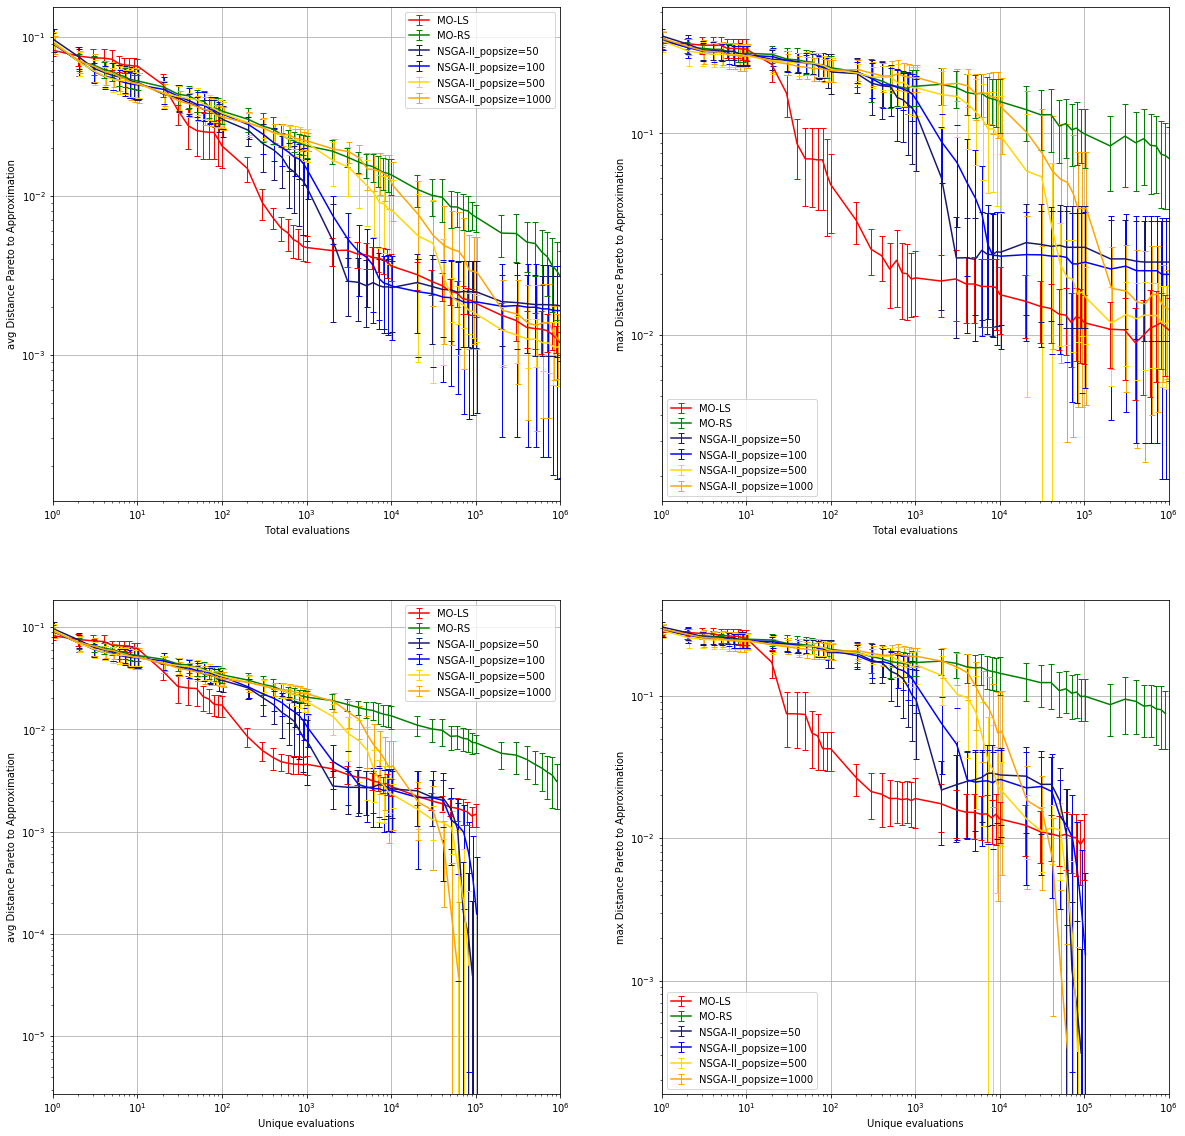

In [321]:
def plotty(ax, evalType, distType):
    plotConvergenceV2(ax, "../data/exp16/new/mols.json", "MO-LS_FixedPop", "MO-LS", "red", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV2(ax, "../data/exp16/new/mors.json", "MO-RandomSearch_FixedPop", "MO-RS", "green", distType=distType, evalType=evalType, mult=1.01)
    plotConvergenceV2(ax, "../data/exp16/new/nsga50.json", "NSGA-II_FixedPop", "NSGA-II_popsize=50", "midnightblue", distType=distType, evalType=evalType, mult=1.02)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100.json", "NSGA-II_FixedPop", "NSGA-II_popsize=100", "blue", distType=distType, evalType=evalType, mult=1.03)
    plotConvergenceV2(ax, "../data/exp16/new/nsga500.json", "NSGA-II_FixedPop", "NSGA-II_popsize=500", "gold", distType=distType, evalType=evalType, mult=1.04)
    plotConvergenceV2(ax, "../data/exp16/new/nsga1000.json", "NSGA-II_FixedPop", "NSGA-II_popsize=1000", "orange", distType=distType, evalType=evalType, mult=1.05)
    
    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(1, 10**6)
    ax.grid()
    ax.legend()
    
fig, axs = plt.subplots(2, 2, figsize=(20,20))

plotty(axs[0][0], "Total", "avg")
plotty(axs[0][1], "Total", "max")
plotty(axs[1][0], "Unique", "avg")
plotty(axs[1][1], "Unique", "max")

#### Results after fixing bug in tournament selection

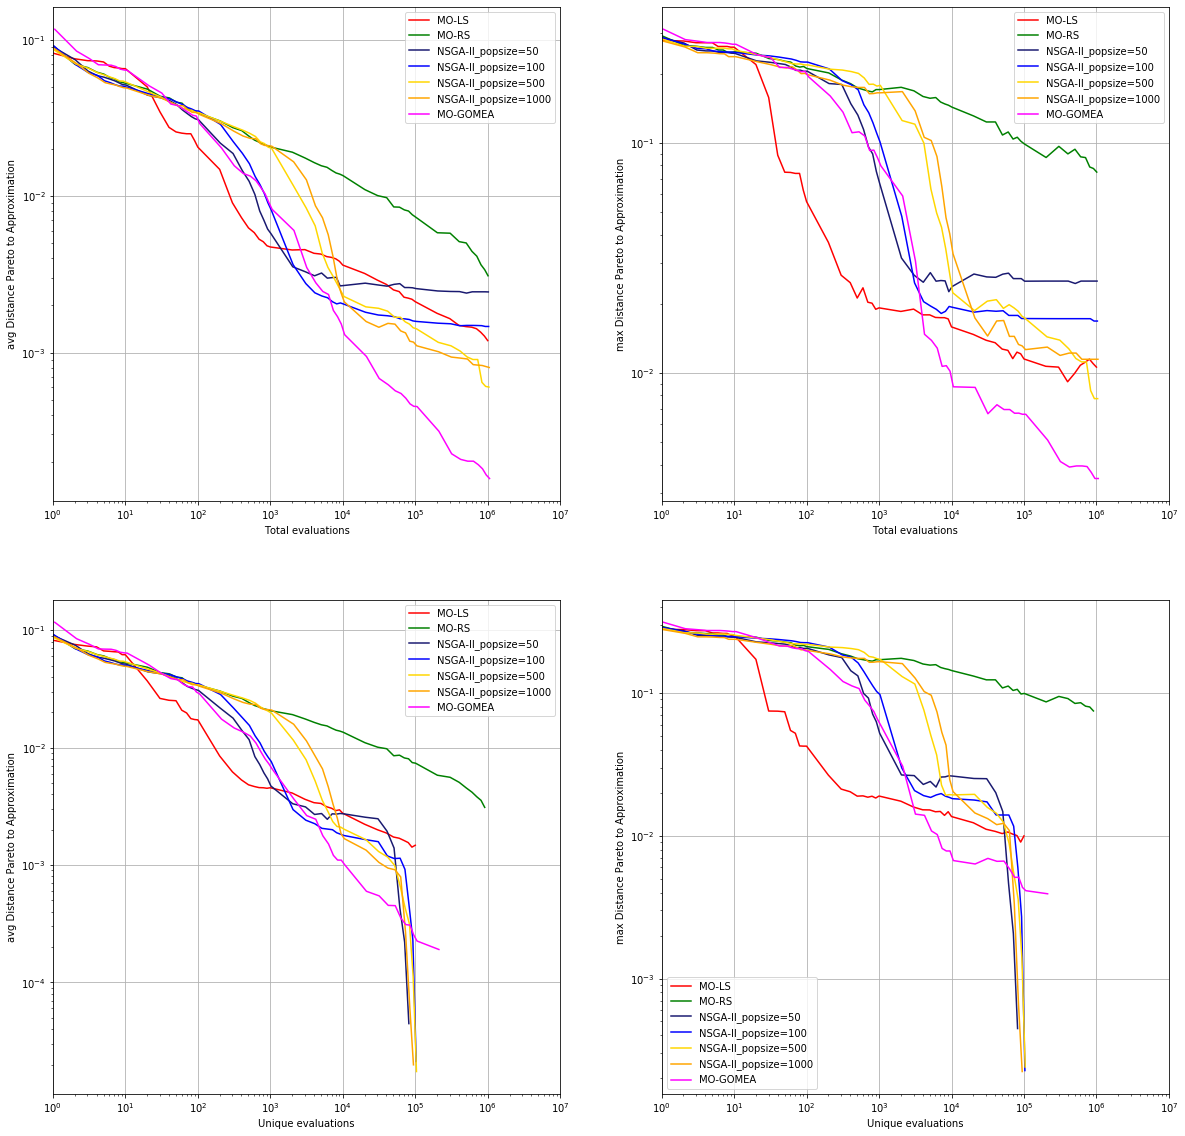

In [37]:
err = False
def plotty(ax, evalType, distType):
    plotConvergenceV2(ax, "../data/exp16/new/mols.json", "MO-LS_FixedPop", "MO-LS", "red", distType=distType, evalType=evalType, mult=1, error=err)
    plotConvergenceV2(ax, "../data/exp16/new/mors.json", "MO-RandomSearch_FixedPop", "MO-RS", "green", distType=distType, evalType=evalType, mult=1.01, error=err)
    plotConvergenceV2(ax, "../data/exp16/new/nsga50-2.json", "NSGA-II_FixedPop", "NSGA-II_popsize=50", "midnightblue", distType=distType, evalType=evalType, mult=1.02, error=err)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100-2.json", "NSGA-II_FixedPop", "NSGA-II_popsize=100", "blue", distType=distType, evalType=evalType, mult=1.03, error=err)
    plotConvergenceV2(ax, "../data/exp16/new/nsga500-2.json", "NSGA-II_FixedPop", "NSGA-II_popsize=500", "gold", distType=distType, evalType=evalType, mult=1.04, error=err)
    plotConvergenceV2(ax, "../data/exp16/new/nsga1000-2.json", "NSGA-II_FixedPop", "NSGA-II_popsize=1000", "orange", distType=distType, evalType=evalType, mult=1.05, error=err)
    
    #Only 10 repetititons
#     plotConvergence(ax, "../data/exp16/new/nsga1000-3.json", "NSGA-II_xo=2p_pop=1000", "NSGA-II_popsize=1000", "purple", distType=distType, evalType=evalType, mult=1.05)
    
    #MO_GOMEA
    plotConvergenceV4(ax, "../data/exp16/new/mogomea10-2.json", "MO-GOMEA", "magenta", distType=distType, evalType=evalType, mult=1.06, error=err)
    
    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(1, 10**7)
    ax.grid()
    ax.legend()
    
fig, axs = plt.subplots(2, 2, figsize=(20,20))

plotty(axs[0][0], "Total", "avg")
plotty(axs[0][1], "Total", "max")
plotty(axs[1][0], "Unique", "avg")
plotty(axs[1][1], "Unique", "max")

#### Different crossover operators in NSGA-II with a popsize of 100. Averages of 20 repetitions

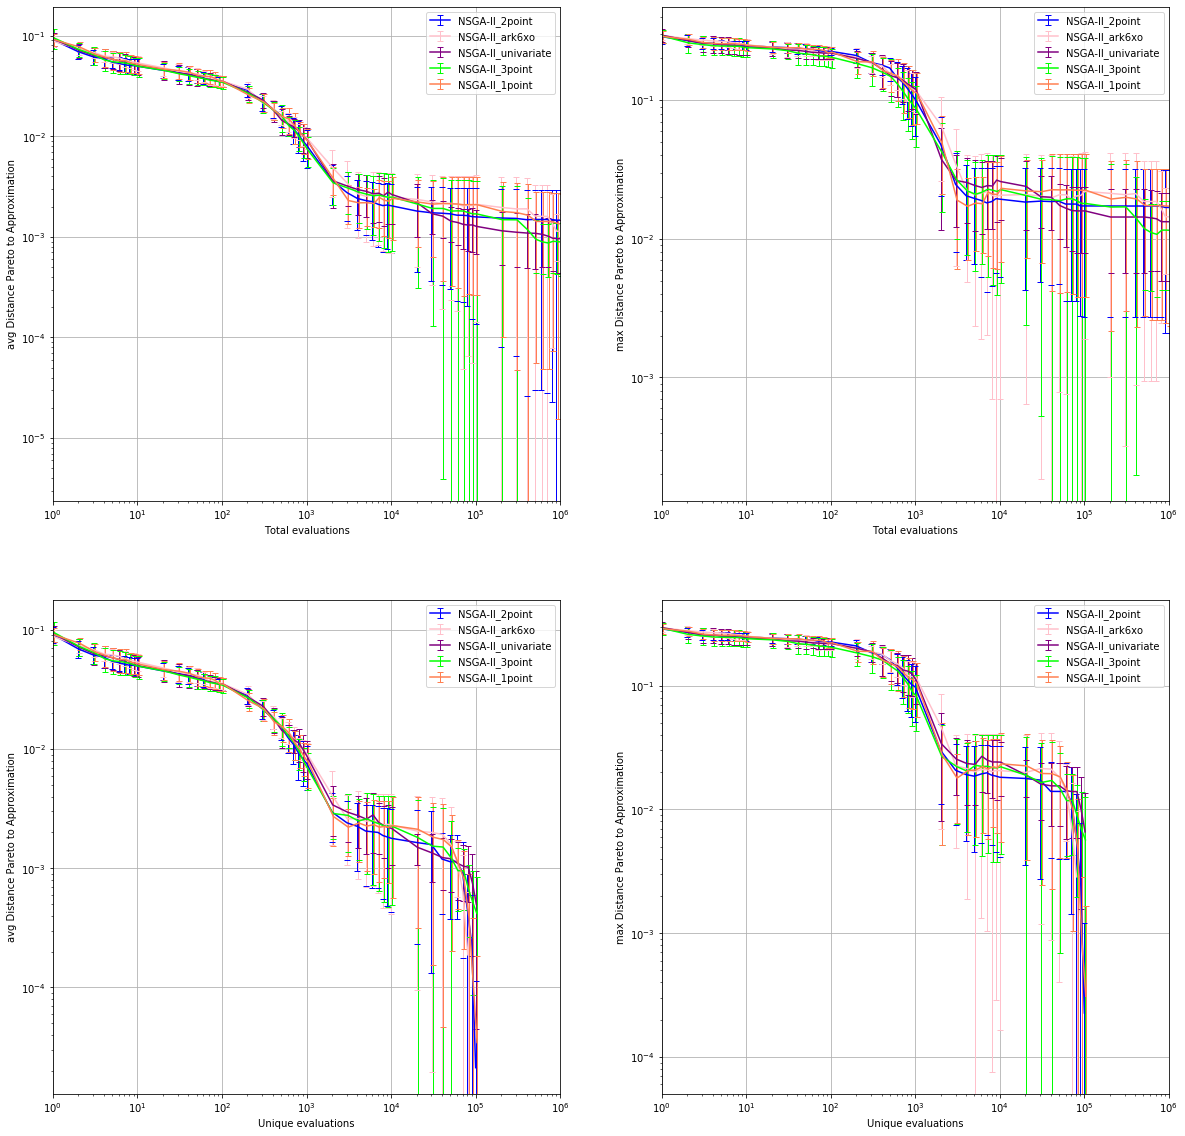

In [323]:
def plotty(ax, evalType, distType):
    plotConvergenceV2(ax, "../data/exp16/new/nsga100-2.json", "NSGA-II_FixedPop", "NSGA-II_2point", "blue", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100_ark6xo_uni.json", "NSGA-II_xo=ark6xo_pop=100", "NSGA-II_ark6xo", "pink", distType=distType, evalType=evalType, mult=1.01)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100_ark6xo_uni.json", "NSGA-II_xo=uni_pop=100", "NSGA-II_univariate", "purple", distType=distType, evalType=evalType, mult=1.02)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100_3p.json", "NSGA-II_xo=3p_pop=100", "NSGA-II_3point", "lime", distType=distType, evalType=evalType, mult=1.03)
    plotConvergenceV2(ax, "../data/exp16/new/nsga100_1p.json", "NSGA-II_xo=1p_pop=100", "NSGA-II_1point", "coral", distType=distType, evalType=evalType, mult=1.04)
    
    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(1, 10**6)
    ax.grid()
    ax.legend()
    
fig, axs = plt.subplots(2, 2, figsize=(20,20))

plotty(axs[0][0], "Total", "avg")
plotty(axs[0][1], "Total", "max")
plotty(axs[1][0], "Unique", "avg")
plotty(axs[1][1], "Unique", "max")

### MAXCUT

##### MAXCUT 25, setting 2 infinites

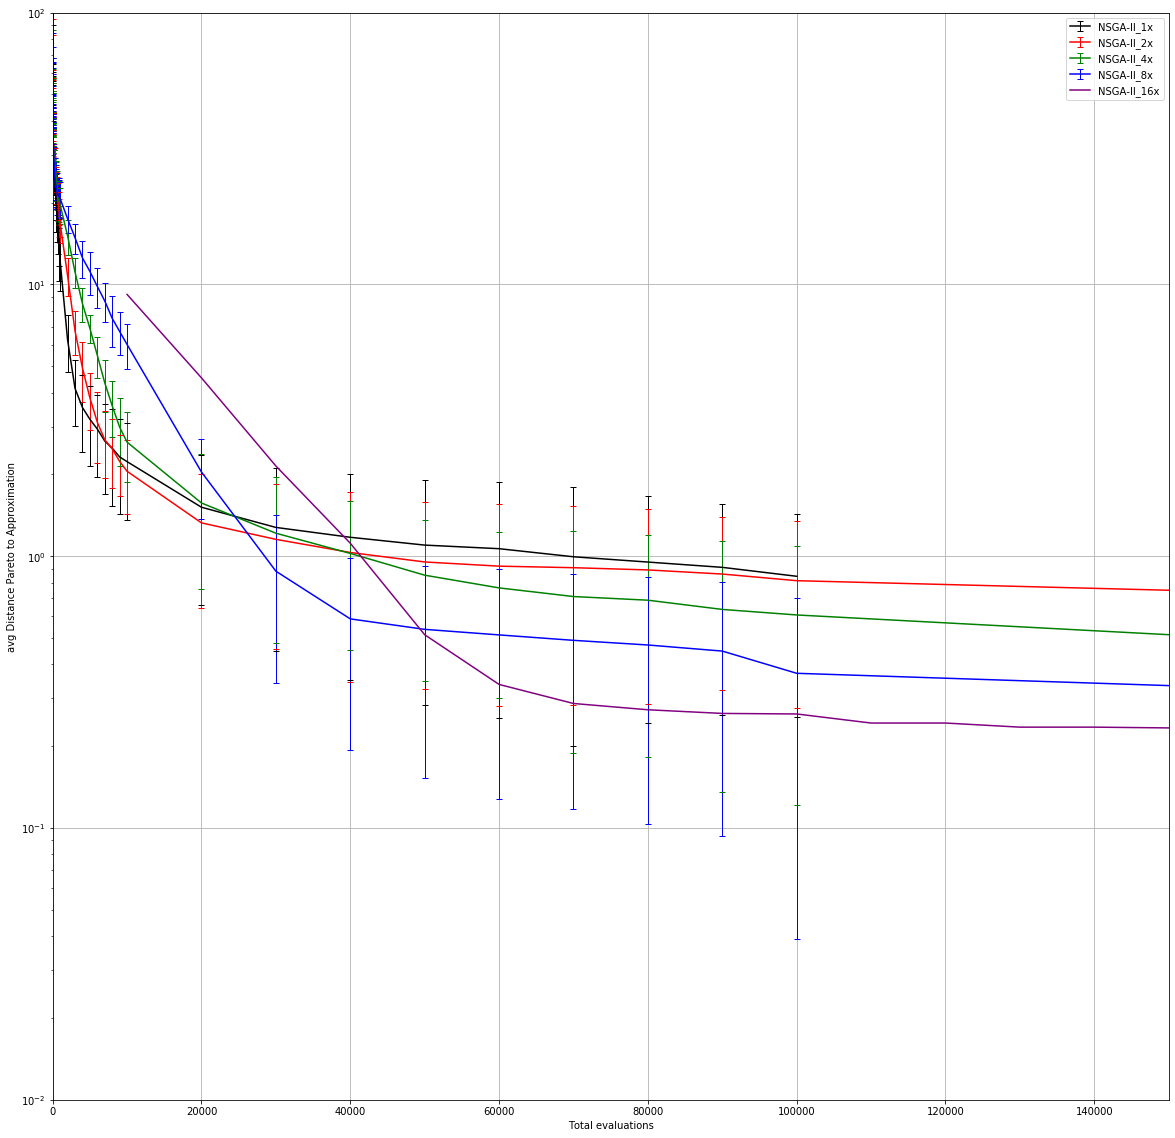

In [345]:
def plotty(ax, evalType, distType):
    plotConvergenceV2(ax, "../data/exp17/maxcut25/nsga1x.json", "NSGA-II_xo=2p_pop=120", "NSGA-II_1x", "black", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV2(ax, "../data/exp17/maxcut25/nsga2x.json", "NSGA-II_xo=2p_pop=240", "NSGA-II_2x", "red", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV2(ax, "../data/exp17/maxcut25/nsga4x.json", "NSGA-II_xo=2p_pop=480", "NSGA-II_4x", "green", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV2(ax, "../data/exp17/maxcut25/nsga8x.json", "NSGA-II_xo=2p_pop=960", "NSGA-II_8x", "blue", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga16x.json", "NSGA-II_xo=2p_pop=1920", "NSGA-II_16x", "purple", distType=distType, evalType=evalType, mult=1)

    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xlim(0, 150000)
    ax.set_ylim(0.01, 100)
    ax.grid()
    ax.legend()
    
fig, ax = plt.subplots(figsize=(20,20))

plotty(ax, "Total", "avg")

##### MAXCUT 25, setting only 1 infinite (same as Deb's code)

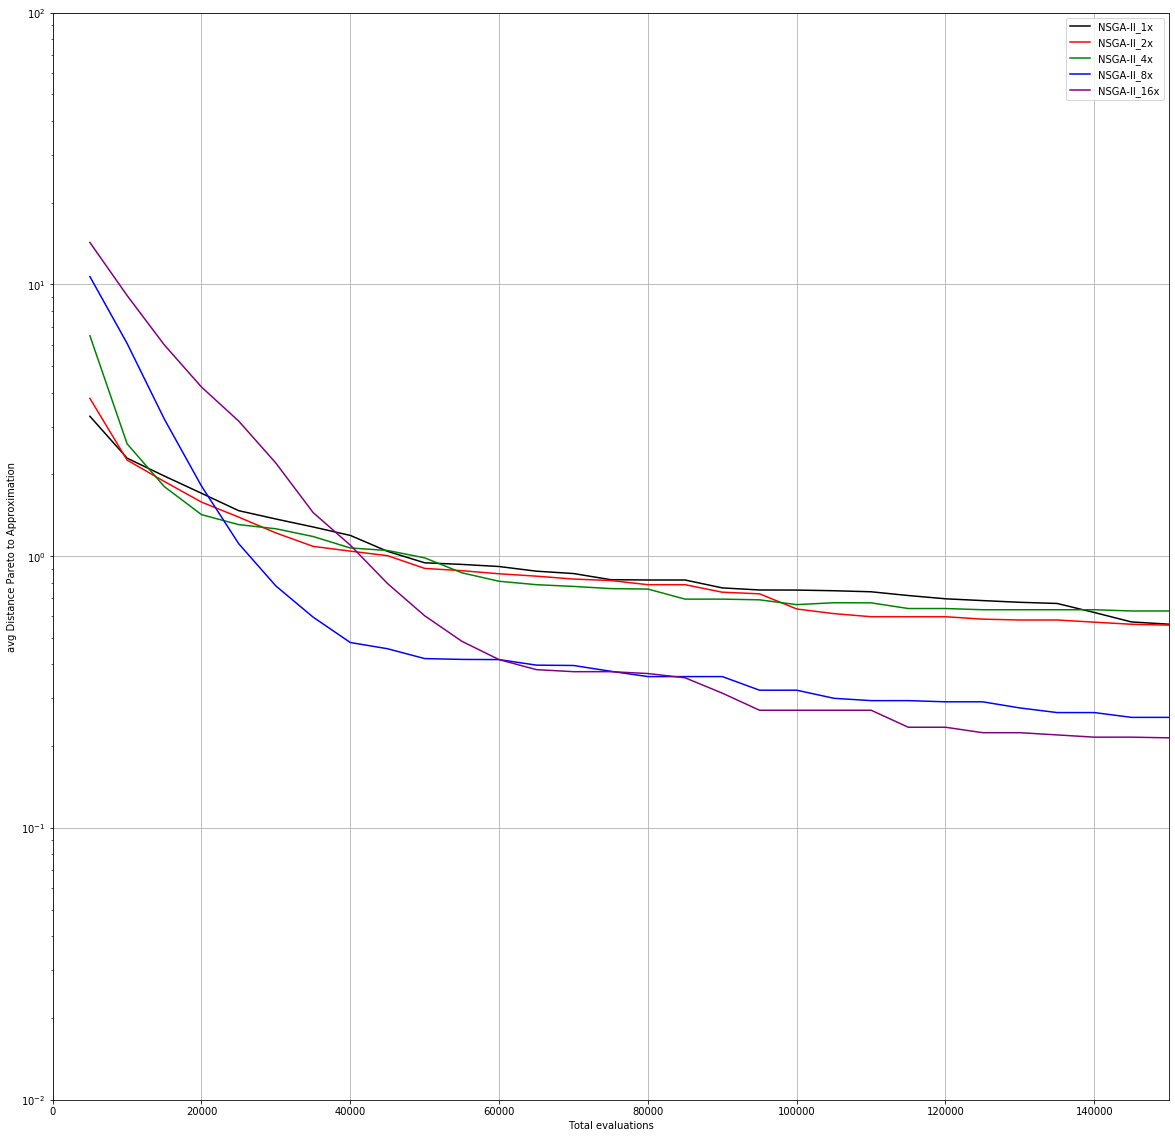

In [347]:
def plotty(ax, evalType, distType):
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga_all-2.json", "NSGA-II_xo=2p_pop=120", "NSGA-II_1x", "black", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga_all-2.json", "NSGA-II_xo=2p_pop=240", "NSGA-II_2x", "red", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga_all-2.json", "NSGA-II_xo=2p_pop=480", "NSGA-II_4x", "green", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga_all-2.json", "NSGA-II_xo=2p_pop=960", "NSGA-II_8x", "blue", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut25/nsga_all-2.json", "NSGA-II_xo=2p_pop=1920", "NSGA-II_16x", "purple", distType=distType, evalType=evalType, mult=1)

    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xlim(0, 150000)
    ax.set_ylim(0.01, 100)
    ax.grid()
    ax.legend()
    
fig, ax = plt.subplots(figsize=(20,20))

plotty(ax, "Total", "avg")

##### MAXCUT 12, Setting 2 infinites

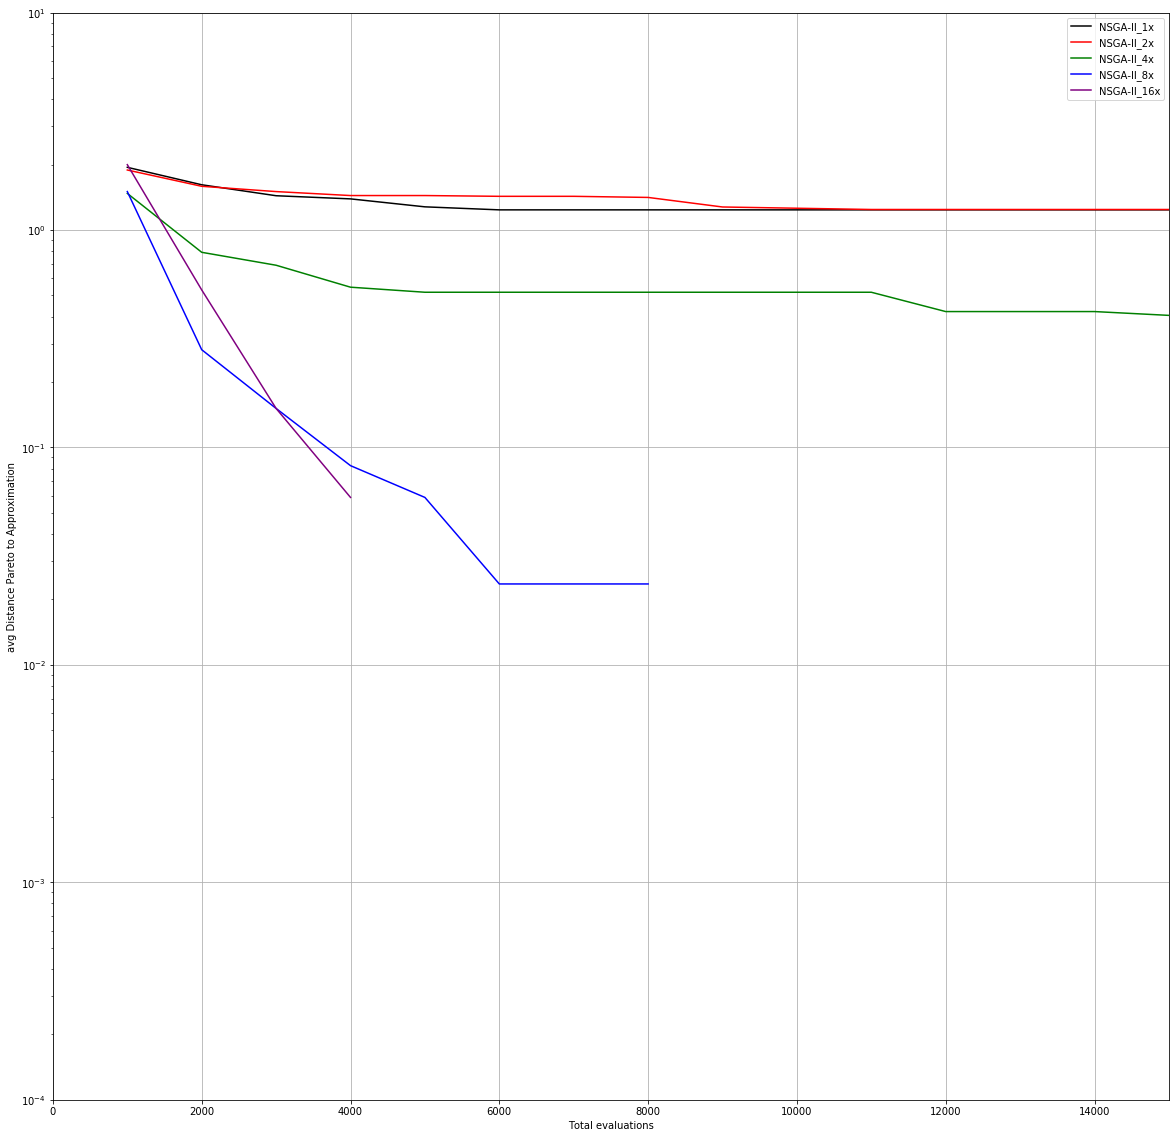

In [344]:
def plotty(ax, evalType, distType):
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all.json", "NSGA-II_xo=2p_pop=40", "NSGA-II_1x", "black", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all.json", "NSGA-II_xo=2p_pop=80", "NSGA-II_2x", "red", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all.json", "NSGA-II_xo=2p_pop=160", "NSGA-II_4x", "green", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all.json", "NSGA-II_xo=2p_pop=320", "NSGA-II_8x", "blue", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all.json", "NSGA-II_xo=2p_pop=640", "NSGA-II_16x", "purple", distType=distType, evalType=evalType, mult=1)

    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xlim(0, 15000)
    ax.set_ylim(0.0001, 10)
    ax.grid()
    ax.legend()
    
fig, ax = plt.subplots(figsize=(20,20))

plotty(ax, "Total", "avg")

##### MAXCUT 12, setting only one infinite (equal to Debs code)

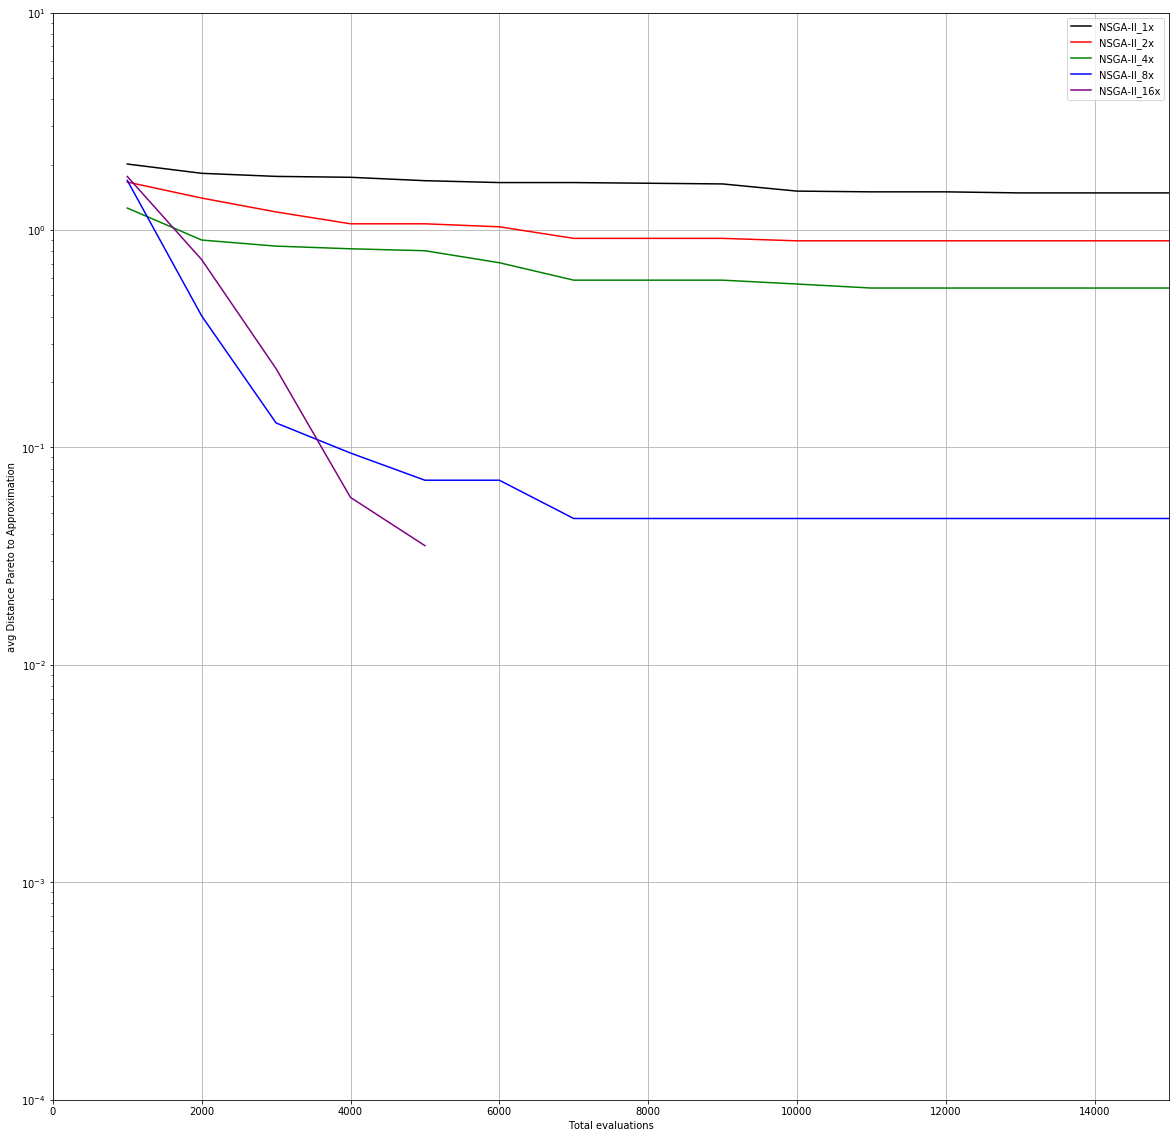

In [346]:
def plotty(ax, evalType, distType):
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all-2.json", "NSGA-II_xo=2p_pop=40", "NSGA-II_1x", "black", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all-2.json", "NSGA-II_xo=2p_pop=80", "NSGA-II_2x", "red", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all-2.json", "NSGA-II_xo=2p_pop=160", "NSGA-II_4x", "green", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all-2.json", "NSGA-II_xo=2p_pop=320", "NSGA-II_8x", "blue", distType=distType, evalType=evalType, mult=1)
    plotConvergenceV3(ax, "../data/exp17/maxcut12/nsga_all-2.json", "NSGA-II_xo=2p_pop=640", "NSGA-II_16x", "purple", distType=distType, evalType=evalType, mult=1)

    ax.set_xlabel(evalType + " evaluations")
    ax.set_ylabel(distType + " Distance Pareto to Approximation")
    ax.set_yscale("log")
    ax.set_xlim(0, 15000)
    ax.set_ylim(0.0001, 10)
    ax.grid()
    ax.legend()
    
fig, ax = plt.subplots(figsize=(20,20))

plotty(ax, "Total", "avg")